In [1]:
%pip install rdkit-pypi
%pip install mordred
%pip install seaborn
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\brend\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\brend\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\brend\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\brend\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

import pandas as pd
import numpy as np
import os 
from pathlib import Path

In [3]:
class mol_analysis():
    def __init__(self, groups):
        self.mol_data = None
        self.all_mols = None
        self.base_path = '/home/brendan/research/FINAL_LIGANDS/Tridentate/'
        self.groups = groups
        self.directories = [(self.base_path + i) for i in self.groups]
        self.group_to_files = {}
        self.group_to_mols = {}
        self.group_to_file_names = {}

        for i in range(len(self.groups)):
            files = Path(self.directories[i]).glob('*')
            self.group_to_files[self.groups[i]] = files
    
    def read_mols(self):
        for group, files in self.group_to_files.items():
            mols = []
            file_names = []
            for f in files:
                mols.append(Chem.MolFromMolFile(str(f)))
                file_names.append(str(f))
            
            for i in range(len(mols) - 1, -1, -1):
                if mols[i] is None:
                    del mols[i]
                    del file_names[i]

            self.group_to_mols[group] = mols
            self.group_to_file_names[group] = file_names
        
    def get_mol_data(self):
        if self.mol_data is None:
            self.calc_mol_data()
        return self.mol_data

    def get_all_mols(self):
        if self.all_mols is not None:
            return self.all_mols
        else:
            self.all_mols = []
            for group in self.groups:
                self.all_mols.extend(self.group_to_mols[group])
            return self.all_mols

    def calc_mol_data(self):
        mol_list = self.get_all_mols()
        calc = Calculator(descriptors, ignore_3D=False)
        mordred_df = calc.pandas(mol_list)
        mordred_df = mordred_df.select_dtypes([np.number])
        print("Data dimensions: ", mordred_df.shape)
        print("Total mols: ", len(mol_list))

        labels = []
        for group in self.groups:
            group_labels = [group for _ in range(len(self.group_to_mols[group]))]
            labels.extend(group_labels)

        file_names = []
        for group in self.groups:
            file_names.extend(self.group_to_file_names[group])

        print("Total labels: ", len(labels))
        print("Total file names: ", len(file_names))

        label_df = pd.DataFrame(labels, columns=['Ligand Type'])
        file_df = pd.DataFrame(file_names, columns=['File Name'])
        data = pd.concat([mordred_df, label_df, file_df], axis=1)

        self.mol_data = data

In [4]:
groups = ['NNN', 'NNO', 'CCC', 'NPP', 'CNO', 'NOS', 'CPP', 'CCO', 'CNN', 'PPP', 'CNP']

mol_reader = mol_analysis(groups=groups)
mol_reader.read_mols()

[20:39:18] Explicit valence for atom # 0 B, 4, is greater than permitted
[20:39:18] Explicit valence for atom # 0 B, 4, is greater than permitted
[20:39:18] Explicit valence for atom # 0 B, 4, is greater than permitted
[20:39:18] Explicit valence for atom # 39 B, 4, is greater than permitted
[20:39:18] Explicit valence for atom # 51 B, 4, is greater than permitted
[20:39:18] Explicit valence for atom # 0 B, 4, is greater than permitted
[20:39:19] Explicit valence for atom # 19 N, 4, is greater than permitted
[20:39:19] Explicit valence for atom # 15 C, 5, is greater than permitted
[20:39:19] Explicit valence for atom # 33 B, 4, is greater than permitted
[20:39:20] Explicit valence for atom # 18 B, 4, is greater than permitted
[20:39:20] Explicit valence for atom # 24 B, 4, is greater than permitted
[20:39:20] Explicit valence for atom # 6 B, 4, is greater than permitted
[20:39:20] Explicit valence for atom # 0 B, 4, is greater than permitted
[20:39:21] Explicit valence for atom # 39 B,

In [5]:
df = mol_reader.get_mol_data()
df


 17%|█▋        | 528/3080 [00:38<04:52,  8.72it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 21%|██        | 632/3080 [00:44<03:13, 12.65it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 35%|███▌      | 1091/3080 [01:18<02:51, 11.56it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 57%|█████▋    | 1752/3080 [02:09<01:55, 11.51it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 58%|█████▊    | 1781/3080 [02:12<02:11,  9.88it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 60%|██████    | 1862/3080 [09:25<5:57:05, 17.59s/it] 

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 65%|██████▌   | 2002/3080 [09:40<02:51,  6.30it/s]  

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 66%|██████▌   | 2033/3080 [09:44<02:30,  6.96it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 67%|██████▋   | 2063/3080 [09:48<02:12,  7.68it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 68%|██████▊   | 2100/3080 [09:53<02:00,  8.16it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 79%|███████▉  | 2442/3080 [10:22<01:17,  8.20it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 97%|█████████▋| 2988/3080 [11:24<00:12,  7.67it/s]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 3080/3080 [11:35<00:00,  4.43it/s]


Data dimensions:  (3080, 1214)
Total mols:  3080
Total labels:  3080
Total file names:  3080


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Ligand Type,File Name
0,23.219304,18.958841,0,0,36.819108,2.415451,4.830902,36.819108,1.227304,4.318736,...,399.267448,6.337579,2494,49,156.0,182.0,11.312500,6.527778,NNN,\home\brendan\research\FINAL_LIGANDS\Tridentat...
1,15.515909,12.091833,0,2,26.949071,2.341493,4.569589,26.949071,1.347454,3.924022,...,327.014893,10.548868,973,24,100.0,113.0,4.444444,4.527778,NNN,\home\brendan\research\FINAL_LIGANDS\Tridentat...
2,12.089765,10.061032,0,0,21.313564,2.247466,4.494933,21.313564,1.332098,3.680451,...,212.106196,7.575221,496,19,76.0,84.0,4.333333,3.694444,NNN,\home\brendan\research\FINAL_LIGANDS\Tridentat...
3,17.746619,13.848396,0,4,30.207091,2.382938,4.609741,30.207091,1.313352,4.058413,...,342.058019,9.501612,1419,30,116.0,132.0,6.416667,5.194444,NNN,\home\brendan\research\FINAL_LIGANDS\Tridentat...
4,11.850325,9.513827,0,2,18.911150,2.243729,4.487457,18.911150,1.181947,3.651920,...,225.220498,5.237686,439,20,74.0,78.0,6.534722,3.583333,NNN,\home\brendan\research\FINAL_LIGANDS\Tridentat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,21.839430,16.151665,0,0,38.166218,2.368761,4.737523,38.166218,1.363079,4.258651,...,386.167376,7.286177,2218,39,142.0,162.0,6.166667,6.305556,CNP,\home\brendan\research\FINAL_LIGANDS\Tridentat...
3076,33.250598,23.593968,0,0,55.933431,2.458392,4.916784,55.933431,1.331748,4.672691,...,568.200568,8.002825,6193,66,222.0,259.0,10.333333,9.222222,CNP,\home\brendan\research\FINAL_LIGANDS\Tridentat...
3077,22.017769,17.162475,0,0,37.021263,2.382350,4.752898,37.021263,1.322188,4.266050,...,384.162959,7.532607,2133,40,146.0,169.0,7.388889,6.166667,CNP,\home\brendan\research\FINAL_LIGANDS\Tridentat...
3078,26.357869,20.156175,0,0,44.572070,2.395849,4.791698,44.572070,1.310943,4.446019,...,464.214326,7.141759,3682,53,174.0,202.0,10.111111,7.583333,CNP,\home\brendan\research\FINAL_LIGANDS\Tridentat...


In [6]:
df.to_csv('./data/Tridentate_desc_data.csv')

In [7]:
df.info()

<class 'mordred._base.pandas_module.MordredDataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Columns: 1216 entries, ABC to File Name
dtypes: float64(907), int64(307), object(2)
memory usage: 28.6+ MB


In [8]:
df['Ligand Type'].value_counts()

NNN    1090
NNO     642
CNN     439
NOS     228
CCC     222
CPP     121
NPP     108
CNO      99
CNP      63
PPP      50
CCO      18
Name: Ligand Type, dtype: int64

The sizes of each tridentate subclass are listed above. Because of the imbalance between subclasses, each one is sampled before performing the rest of the analysis in order to create more balanced and informative visuals.

In [9]:
# sample a smaller group of the data 
sample_size = 80
sampled_data = pd.DataFrame()
for i in range(len(groups) - 1):
    if groups[i] == 'CNP':
        sample_size = 63
    elif groups[i] == 'PPP':
        sample_size = 50
    elif groups[i] == 'CCO':
        sample_size = 18
    else:
        sample_size = 80
    sample = df[df['Ligand Type'] == groups[i]].sample(n=sample_size, random_state=13)
    sampled_data = pd.concat([sampled_data, sample])

sampled_data = pd.concat([sampled_data, df[df['Ligand Type'] == 'CNP']])
sampled_data['Ligand Type'].value_counts()

NNN    80
NNO    80
CCC    80
NPP    80
CNO    80
NOS    80
CPP    80
CNN    80
CNP    63
PPP    50
CCO    18
Name: Ligand Type, dtype: int64

In [10]:
X = sampled_data.loc[:, ~df.columns.isin(['File Name', 'Ligand Type'])]
sample_labels = pd.DataFrame(sampled_data['Ligand Type'])
sample_file_names = pd.DataFrame(sampled_data['File Name'])

In [11]:
sampled_data.reset_index(inplace=True)

In [12]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_norm = scaler.fit_transform(X)

In [15]:
# PCA
from sklearn.decomposition import PCA
pca_mols = PCA(n_components=4, random_state=13)

In [16]:
principal_comps = pca_mols.fit_transform(X_norm)
principal_mols_df = pd.DataFrame(data = principal_comps
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'
             , 'principal component 4'])
print('Explained variation per principal component: {}'.format(pca_mols.explained_variance_ratio_))

Explained variation per principal component: [0.48392987 0.25672935 0.05967438 0.04450055]


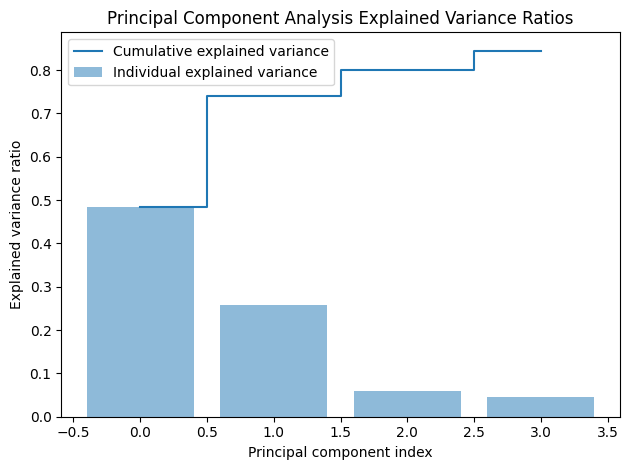

In [17]:
import matplotlib.pyplot as plt

exp_var_pca = pca_mols.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("Principal Component Analysis Explained Variance Ratios")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

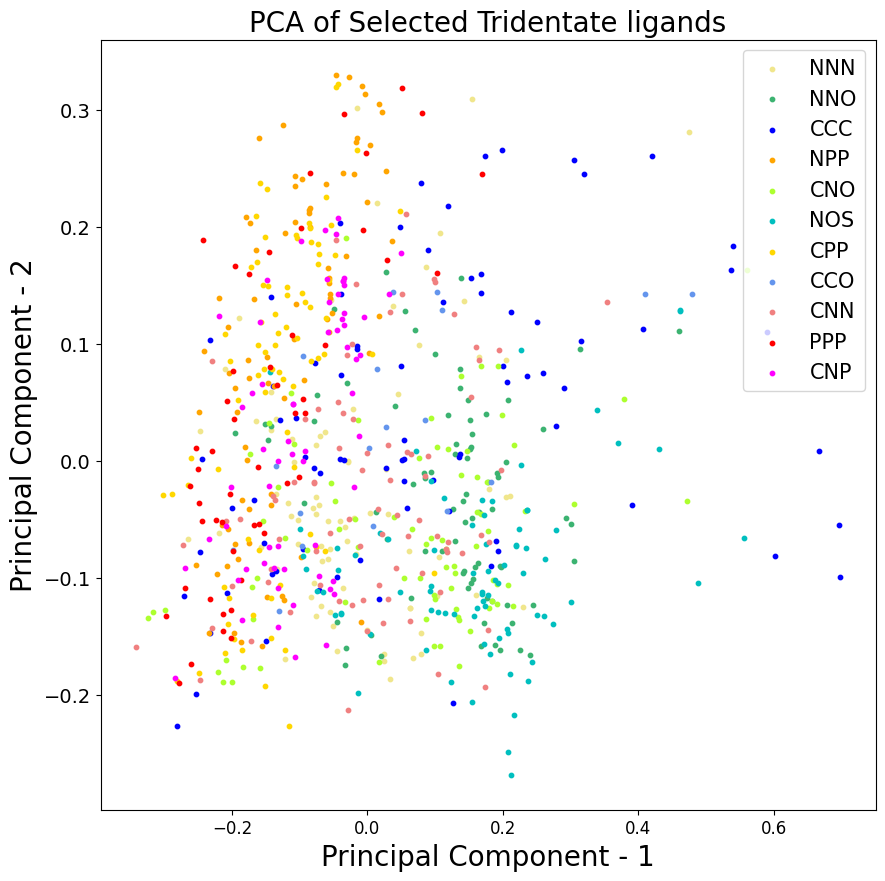

In [18]:
# plot PCs for each class
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Selected Tridentate ligands",fontsize=20)
targets = ['NNN', 'NNO', 'CCC', 'NPP', 'CNO', 'NOS', 'CPP', 'CCO', 'CNN', 'PPP', 'CNP']
colors = ['khaki', 'mediumseagreen', 'blue', 'orange', 'greenyellow', 'c', 'gold', 'cornflowerblue', 'lightcoral', 'red', 'magenta']
for target, color in zip(targets,colors):
    indicesToKeep = sampled_data['Ligand Type'] == target
    plt.scatter(principal_mols_df.loc[indicesToKeep, 'principal component 1']
               , principal_mols_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 10)

plt.legend(targets,prop={'size': 15})

In [67]:
# UMAP Analysis 
import umap

In [68]:
reducer = umap.UMAP(random_state=13 , n_neighbors=12, min_dist=.15)

AttributeError: module 'umap' has no attribute 'UMAP'

In [117]:
embedding = reducer.fit_transform(X_norm)
embedding.shape

(824, 2)

In [118]:
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
labeled_umap = pd.concat([umap_df, sample_labels], axis=1)
labeled_umap.head(3)

,x,y,Ligand Type
0,8.994096,7.540523,NNN
1,8.534904,6.988992,NaN
2,9.158299,5.705950,NaN


<Figure size 640x480 with 0 Axes>

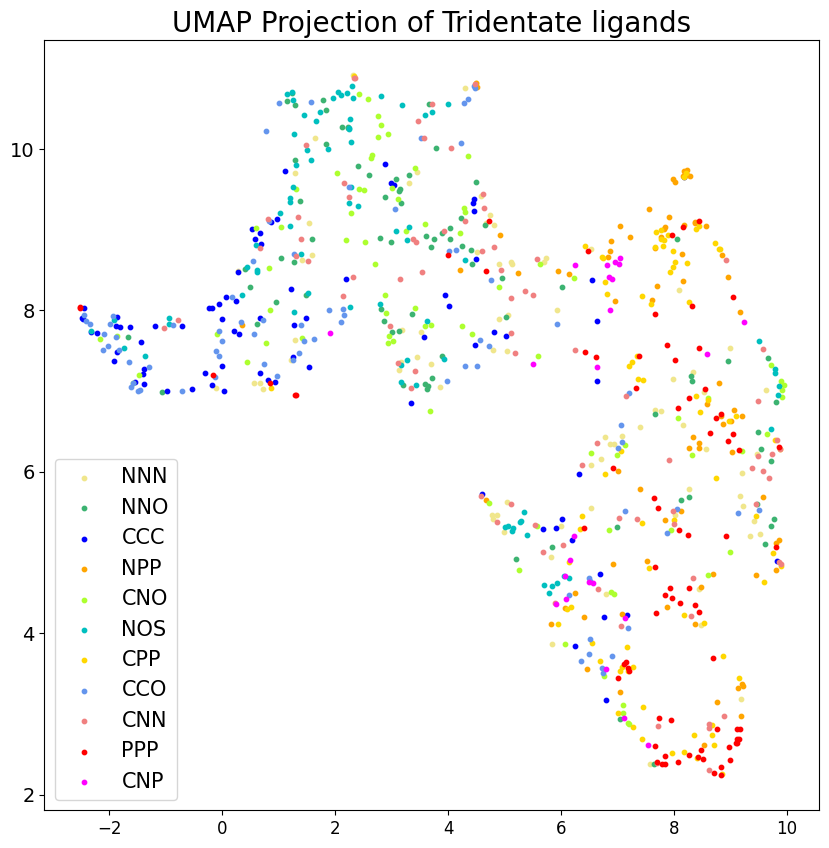

In [120]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("UMAP Projection of Tridentate ligands",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = sampled_data['Ligand Type'] == target
    plt.scatter(umap_df.loc[indicesToKeep, 'x']
               , umap_df.loc[indicesToKeep, 'y'], c = color, s = 10)

plt.legend(targets,prop={'size': 15})

In [121]:
# Clustering attempts
from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=4, random_state=13).fit(umap_df)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(umap_df)
    sse.append(kmeans.inertia_)

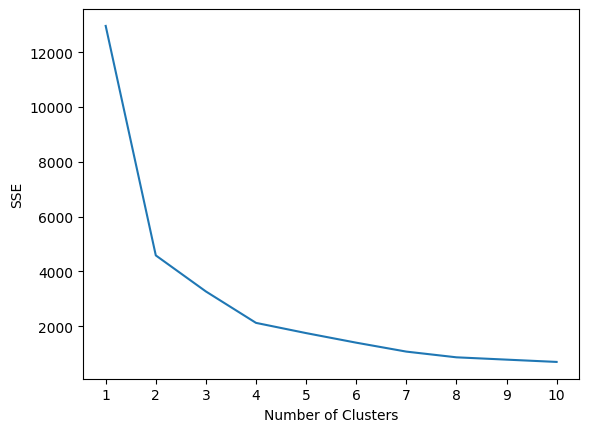

In [122]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [195]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_norm)
    score = silhouette_score(X_norm, kmeans.labels_)
    silhouette_coefficients.append(score)

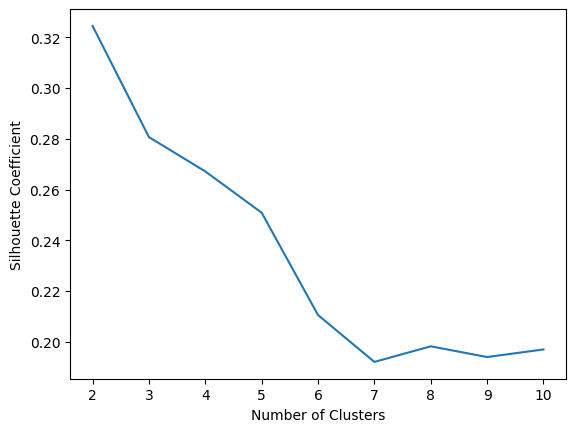

In [196]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [231]:
kmeans = KMeans(n_clusters=4, random_state=13)
label = kmeans.fit_predict(umap_df)

In [232]:
# plt.figure()
# plt.title("KMeans")
u_labels = np.unique(label)

# for i in u_labels:
#     plt.scatter(umap_df.loc[label == i, 'x'], umap_df.loc[label == i, 'y'], s = 5)

Text(0.5, 1.0, 'KMeans Clustering of UMAP Projection Data')

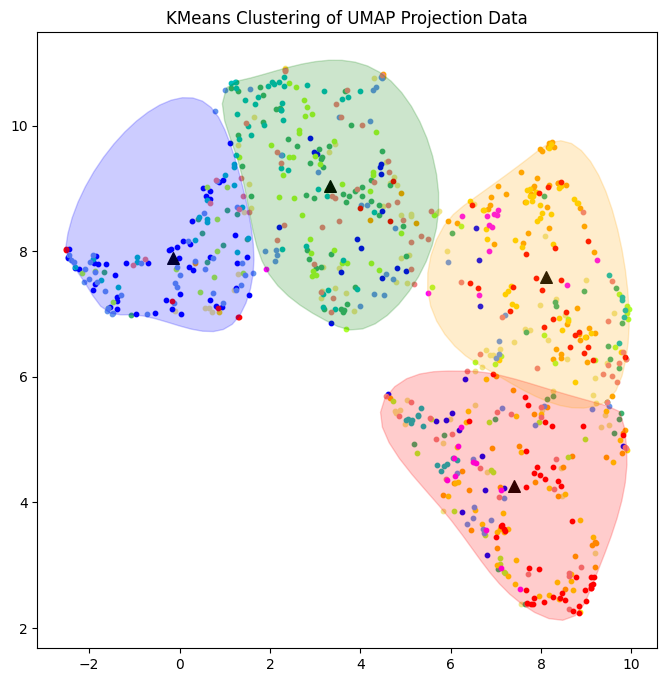

In [233]:
from scipy.spatial import ConvexHull
from scipy import interpolate

fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
for target, color in zip(targets,colors):
    indicesToKeep = sampled_data['Ligand Type'] == target
    plt.scatter(umap_df.loc[indicesToKeep, 'x']
               , umap_df.loc[indicesToKeep, 'y'], c = color, s = 10)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

# plot centers
plt.scatter(cen_x, cen_y, marker='^',color='black', s=70)
# cluster_colors = ['seagreen', 'cyan', 'yellow', 'blue', 'red', 'orange', 'green']
cluster_colors = ['green', 'red', 'blue', 'orange']

# draw enclosure
for i in u_labels:
    points = umap_df.loc[label == i][['x', 'y']].values

    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])

    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    # plot shape
    plt.fill(interp_x, interp_y, '--', c=cluster_colors[i], alpha=0.2)
    
plt.title('KMeans Clustering of UMAP Projection Data')

In [234]:
# corr = df.corr()

# kot = corr[corr>=.9]
# plt.figure(figsize=(12,8))
# sns.heatmap(kot, cmap="Greens")
ATS_df = df.filter(regex='ATS')

# df.corr()
ATS_df

,ATS0dv,ATS1dv,ATS2dv,ATS3dv,ATS4dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0d,...,GATS3pe,GATS1are,GATS2are,GATS3are,GATS1p,GATS2p,GATS3p,GATS1i,GATS2i,GATS3i
0,548.000000,602.000000,872.000000,924.000000,816.000000,762.000000,755.000000,876.000000,968.000000,261.0,...,0.804093,0.684711,1.001778,0.796484,0.914792,0.851052,1.022818,1.069914,0.984443,1.098845
1,263.049383,275.555556,338.111111,306.000000,251.000000,218.222222,193.444444,178.333333,146.666667,111.0,...,0.960543,0.592634,0.877740,0.961873,0.780279,1.188286,0.749936,0.970983,1.262716,0.962855
2,320.000000,373.000000,531.000000,561.000000,451.000000,385.000000,341.000000,297.000000,265.000000,167.0,...,0.945959,0.741437,0.822409,1.000646,0.980043,0.919679,0.870489,1.140978,1.115738,1.030164
3,299.049383,321.444444,399.000000,370.000000,301.777778,269.555556,257.888889,227.777778,197.444444,129.0,...,1.053588,0.515564,0.639606,1.070932,0.772700,0.973013,0.931662,0.983405,1.225119,1.048409
4,188.000000,189.000000,224.000000,200.000000,136.000000,130.000000,130.000000,120.000000,84.000000,91.0,...,1.176433,0.819295,1.505626,1.156820,1.161240,0.904279,1.170104,1.497807,1.105890,1.072200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,484.617284,543.666667,756.777778,795.111111,828.111111,994.666667,1133.111111,1106.555556,987.753086,317.0,...,1.096025,0.997200,0.940106,1.134892,0.924097,1.055246,1.397928,0.924957,0.903008,1.205384
2233,292.913580,309.777778,398.222222,412.333333,427.888889,499.111111,461.666667,370.444444,274.666667,163.0,...,1.023622,0.800122,1.069606,1.119925,0.839919,1.043923,1.507725,0.882365,1.051161,1.052331
2234,316.308642,317.666667,407.555556,432.666667,437.333333,511.111111,467.222222,372.444444,283.333333,163.0,...,0.905481,0.825478,1.351668,0.929204,0.921376,1.061401,1.511098,0.952667,1.022329,0.991480
2235,300.308642,318.666667,416.555556,420.666667,428.222222,506.222222,470.000000,387.888889,303.666667,166.0,...,0.955302,0.983832,1.014216,1.016282,0.896819,1.047660,1.519320,0.964647,0.980634,1.135026


In [236]:
sampled_data.to_csv('./data/feature_data.csv')

In [153]:
# analyzing mordred data without ATS descriptors 
df_no_ATS = sampled_data.drop(sampled_data.filter(regex='ATS').columns, axis=1)
df_no_ATS.info()
# df = df.drop(df.filter(regex='Test').columns, axis=1)

<class 'mordred._base.pandas_module.MordredDataFrame'>
RangeIndex: 824 entries, 0 to 823
Columns: 798 entries, index to File Name
dtypes: float64(488), int64(308), object(2)
memory usage: 5.0+ MB


In [159]:
# X = sampled_data.loc[:, ~df.columns.isin(['File Name', 'Ligand Type'])]
X_no_ATS = df_no_ATS.loc[:, ~df_no_ATS.columns.isin(['File Name', 'Ligand Type', 'index'])]
scaler = Normalizer()
X_norm_no_ATS = scaler.fit_transform(X_no_ATS)

In [160]:
pca_no_ATS = PCA(n_components=4, random_state=13)
princ_comps_no_ATS = pca_no_ATS.fit_transform(X_norm_no_ATS)
pca_df_no_ATS = pd.DataFrame(data = princ_comps_no_ATS
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'
             , 'principal component 4'])
print('Explained variation per principal component: {}'.format(pca_no_ATS.explained_variance_ratio_))

Explained variation per principal component: [0.67856798 0.17623331 0.04685485 0.03428592]


<Figure size 640x480 with 0 Axes>

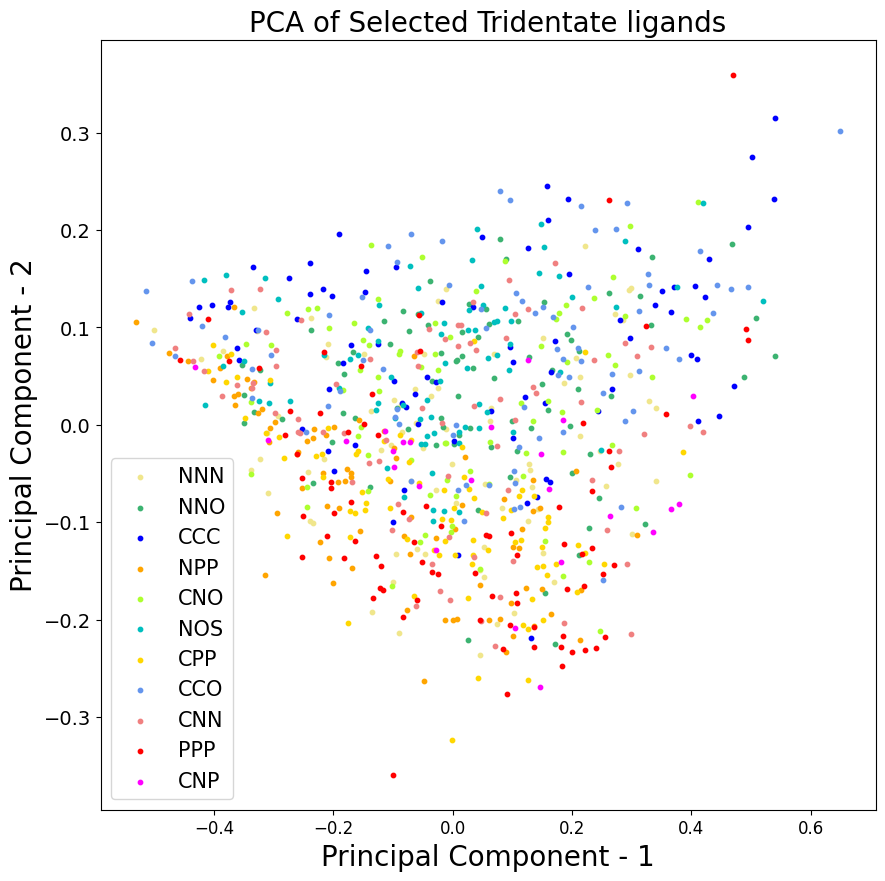

In [161]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Selected Tridentate ligands",fontsize=20)
targets = ['NNN', 'NNO', 'CCC', 'NPP', 'CNO', 'NOS', 'CPP', 'CCO', 'CNN', 'PPP', 'CNP']
colors = ['khaki', 'mediumseagreen', 'blue', 'orange', 'greenyellow', 'c', 'gold', 'cornflowerblue', 'lightcoral', 'red', 'magenta']
for target, color in zip(targets,colors):
    indicesToKeep = sampled_data['Ligand Type'] == target
    plt.scatter(pca_df_no_ATS.loc[indicesToKeep, 'principal component 1']
               , pca_df_no_ATS.loc[indicesToKeep, 'principal component 2'], c = color, s = 10)

plt.legend(targets,prop={'size': 15})

In [164]:
# Getting top PC loadings
# pandas_df = pd.DataFrame(df)
loadings = pd.DataFrame(pca_no_ATS.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X_no_ATS.columns.values)
loadings

,PC1,PC2,PC3,PC4
ABC,0.002852,0.002256,0.000505,-0.001807
ABCGG,0.002642,0.002866,0.001240,-0.003438
nAcid,0.000113,0.000333,-0.000164,0.000092
nBase,0.000057,0.000167,0.000091,-0.000172
SpAbs_A,0.004856,0.004124,-0.000311,-0.002130
...,...,...,...,...
WPol,0.004691,-0.000047,0.000816,0.001562
Zagreb1,0.018160,0.010992,0.002945,-0.005827
Zagreb2,0.020411,0.008713,0.001624,0.001448
mZagreb1,0.001493,0.002131,0.002133,-0.004758


In [68]:
abs_loadings = loadings.abs()
abs_loadings

,PC1,PC2,PC3,PC4
ABC,0.000310,0.000384,0.000225,0.000117
ABCGG,0.000341,0.000269,0.000179,0.000017
nAcid,0.000031,0.000036,0.000007,0.000017
nBase,0.000018,0.000006,0.000008,0.000002
SpAbs_A,0.000534,0.000731,0.000432,0.000202
...,...,...,...,...
WPol,0.000201,0.000548,0.000507,0.001021
Zagreb1,0.001724,0.002429,0.001581,0.001332
Zagreb2,0.001652,0.002800,0.002023,0.002216
mZagreb1,0.000246,0.000058,0.000009,0.000130


In [165]:
loadings = pca_no_ATS.components_.T * np.sqrt(pca_no_ATS.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X_no_ATS.columns.values)
loading_matrix

,PC1,PC2,PC3,PC4
ABC,0.000625,0.000252,0.000029,-0.000089
ABCGG,0.000579,0.000320,0.000071,-0.000169
nAcid,0.000025,0.000037,-0.000009,0.000005
nBase,0.000012,0.000019,0.000005,-0.000008
SpAbs_A,0.001064,0.000461,-0.000018,-0.000105
...,...,...,...,...
WPol,0.001028,-0.000005,0.000047,0.000077
Zagreb1,0.003980,0.001228,0.000170,-0.000287
Zagreb2,0.004474,0.000973,0.000094,0.000071
mZagreb1,0.000327,0.000238,0.000123,-0.000234


In [166]:
abs_loadings_matrix = loading_matrix.abs()

In [172]:
pc1_max_loadings = abs_loadings_matrix.sort_values(by=['PC1'], ascending=False).PC1
pc1_max_loadings.head(10)

GRAV       0.145745
MOMI-Y     0.098915
MOMI-X     0.087066
GRAVp      0.074559
MOMI-Z     0.027558
WPath      0.019725
BertzCT    0.017527
Mor01se    0.017100
Mor01      0.016699
TMPC10     0.014867
Name: PC1, dtype: float64

In [168]:
pc2_max_loadings = abs_loadings_matrix.sort_values(by=['PC2'], ascending=False).PC2
pc2_max_loadings.head(10)

WPath      0.061020
MOMI-Z     0.059288
GRAVp      0.035826
Mor01      0.035261
Mor01se    0.032196
GRAV       0.018189
Mor01p     0.017855
Mor01v     0.012873
MOMI-Y     0.012694
TMPC10     0.011708
Name: PC2, dtype: float64

In [170]:
pc3_max_loadings = abs_loadings_matrix.sort_values(by=['PC3'], ascending=False).PC3
pc3_max_loadings.head(10)

MOMI-Z     0.032561
Mor01      0.026559
Mor01se    0.023832
MOMI-X     0.021489
MOMI-Y     0.016126
Mor01p     0.009377
BertzCT    0.007031
Mor01v     0.005360
GRAVp      0.004014
TMPC10     0.003681
Name: PC3, dtype: float64

In [171]:
pc4_max_loadings = abs_loadings_matrix.sort_values(by=['PC4'], ascending=False).PC4
pc4_max_loadings.head(10)

WPath      0.028783
MOMI-Z     0.018244
Mor01      0.015819
TMPC10     0.014899
Mor01se    0.013550
BertzCT    0.011706
MOMI-Y     0.010353
GRAV       0.007666
GRAVp      0.006222
MOMI-X     0.005200
Name: PC4, dtype: float64

In [183]:
reducer_no_ATS = umap.UMAP(random_state=13, n_neighbors=100, min_dist=.5)
embedding = reducer_no_ATS.fit_transform(X_norm_no_ATS)
embedding.shape

(824, 2)

<Figure size 640x480 with 0 Axes>

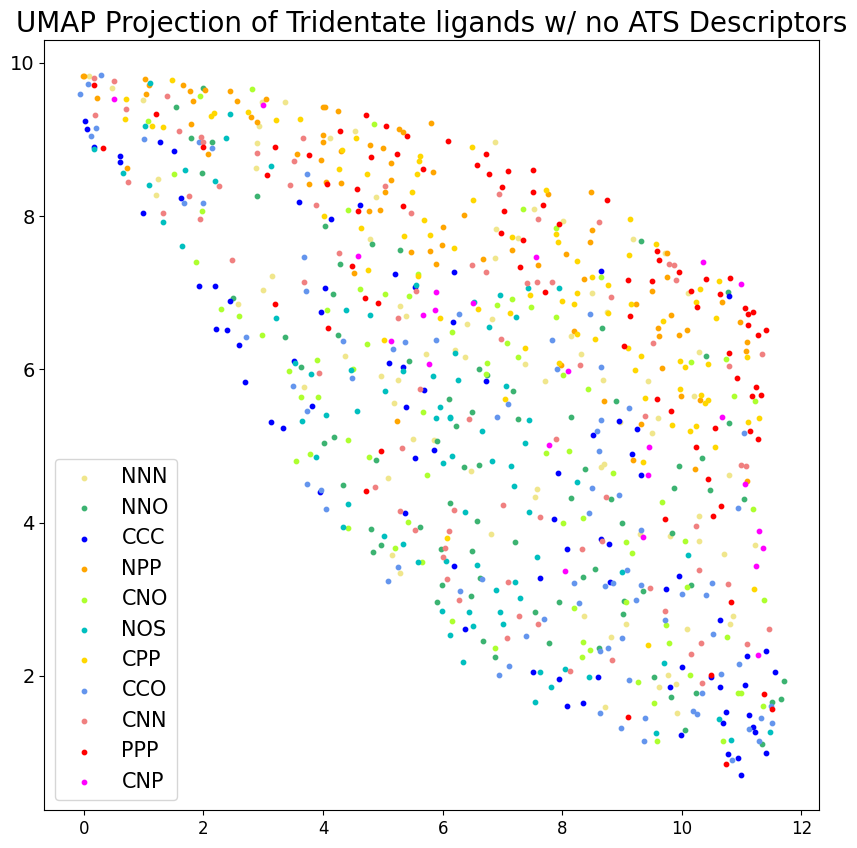

In [184]:
umap_no_ATS_df = pd.DataFrame(embedding, columns=('x', 'y'))

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("UMAP Projection of Tridentate ligands w/ no ATS Descriptors",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = sampled_data['Ligand Type'] == target
    plt.scatter(umap_no_ATS_df.loc[indicesToKeep, 'x']
               , umap_no_ATS_df.loc[indicesToKeep, 'y'], c = color, s = 10)

plt.legend(targets,prop={'size': 15})

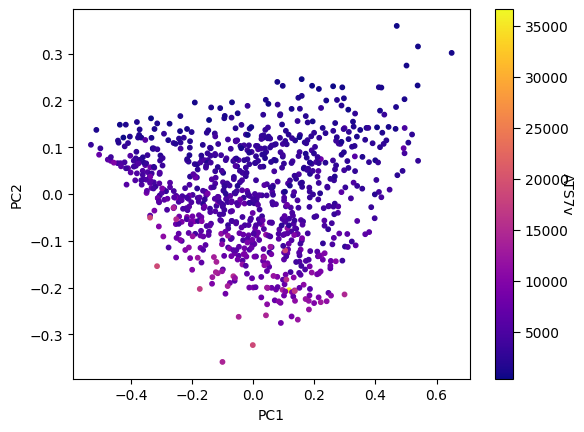

In [186]:
# plot PCs for each class
import matplotlib.pyplot as plt
# ax.figure(figsize=(10,10))
# ax.xticks(fontsize=12)
# ax.yticks(fontsize=14)
# ax.xlabel('Principal Component - 1',fontsize=20)
# ax.ylabel('Principal Component - 2',fontsize=20)
# ax.title("Principal Component Analysis of Tridentate ligands",fontsize=20)
color = sampled_data.GRAV
f, ax = plt.subplots()

points = ax.scatter(pca_df_no_ATS.loc[:,'principal component 1']
            , pca_df_no_ATS.loc[:,'principal component 2'], c = color, s = 10, cmap="plasma")
cbar = f.colorbar(points)
cbar.ax.set_ylabel('ATS7v', rotation=270)
cbar.ax.tick_params(size=5)
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
plt.show()


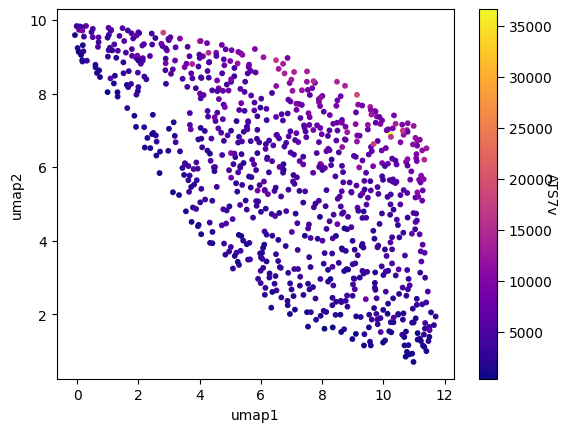

In [187]:
color = sampled_data.loc[:, 'GRAV']
f, ax = plt.subplots()

points = ax.scatter(umap_no_ATS_df.loc[:,'x']
            , umap_no_ATS_df.loc[:,'y'], c = color, s = 10, cmap="plasma")
cbar = f.colorbar(points)
cbar.ax.set_ylabel('ATS7v', rotation=270)
cbar.ax.tick_params(size=5)
ax.set_ylabel('umap2')
ax.set_xlabel('umap1')
plt.show()

In [215]:
# labeled_umap = pd.concat([umap_df, ])
# sample_labels.reset_index(inplace=True)
# sample_file_names.reset_index(inplace=True)
labeled_umap = pd.concat([umap_df, sample_labels, sample_file_names], axis=1)

In [218]:
labeled_umap = labeled_umap.drop(columns=['level_0'], axis=1)
labeled_umap

,x,y,Ligand Type,File Name
0,8.994096,7.540523,NNN,\home\brendan\research\Annulment\UniqueLigand_...
1,8.534904,6.988992,NNN,\home\brendan\research\Annulment\UniqueLigand_...
2,9.158299,5.705950,NNN,\home\brendan\research\Annulment\UniqueLigand_...
3,9.199784,5.981350,NNN,\home\brendan\research\Annulment\UniqueLigand_...
4,1.210459,7.387042,NNN,\home\brendan\research\Annulment\UniqueLigand_...
...,...,...,...,...
819,7.541477,2.622400,CNP,\home\brendan\research\Annulment\UniqueLigand_...
820,5.908047,4.360411,CNP,\home\brendan\research\Annulment\UniqueLigand_...
821,6.153751,4.906404,CNP,\home\brendan\research\Annulment\UniqueLigand_...
822,6.086808,4.423069,CNP,\home\brendan\research\Annulment\UniqueLigand_...


In [225]:
stripped_file_names = pd.DataFrame(sample_file_names["File Name"].apply(os.path.basename))
# labeled_umap
labeled_umap['File Name'] = stripped_file_names['File Name']
labeled_umap


,x,y,Ligand Type,File Name
0,8.994096,7.540523,NNN,RUQZEK_Fe_1_3_NNN.mol
1,8.534904,6.988992,NNN,RUQZOU_Fe_1_3_NNN.mol
2,9.158299,5.705950,NNN,BADQIH_Rh_2_3_NNN.mol
3,9.199784,5.981350,NNN,KADPEN_Fe_2_3_NNN.mol
4,1.210459,7.387042,NNN,TIJBUJ_Re_1_3_NNN.mol
...,...,...,...,...
819,7.541477,2.622400,CNP,XACHUH_Zr_3_3_CNP.mol
820,5.908047,4.360411,CNP,OVOXAA_Fe_3_3_CNP.mol
821,6.153751,4.906404,CNP,CEYJAS_Rh_2_3_CNP.mol
822,6.086808,4.423069,CNP,DAQXUQ_Ir_2_3_CNP.mol


In [226]:
labeled_umap.to_csv('./data/labeled_umap.csv')

In [230]:
# principal_mols_df
labeled_pca = pd.concat([principal_mols_df, sample_labels, stripped_file_names], axis=1).drop(['index', 'level_0'], axis=1)
labeled_pca.to_csv('./data/labeled_pca.csv')

In [147]:
labeled_data.to_csv('labeled_mordred_descriptor_data.csv')
principal_mols_df.to_csv('pca_df.csv')

In [148]:
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
desc_names = calc.GetDescriptorNames()

Mol_descriptors =[]
for mol in mols:
    # Calculate all 200 descriptors for each molecule
    descriptors = calc.CalcDescriptors(mol)
    Mol_descriptors.append(descriptors)

df_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)

In [150]:
df_200_descriptors.shape

(824, 208)

ORIGINAL CODE FOR READING FILES IN

In [12]:
# read in mols

NNN_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/NNN'
NNO_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/NNO'
CCC_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/CCC'
NPP_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/NPP'
CNO_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/CNO'
NOS_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/NOS'
CPP_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/CPP'
CCO_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/CCO'
CNN_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/CNN'
PPP_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/PPP'
CNP_directory = '/home/brendan/research/Annulment/UniqueLigand_tmqm1/Tridentate/CNP'

NNN_files = Path(NNN_directory).glob('*')
NNO_files = Path(NNO_directory).glob('*')
CCC_files = Path(CCC_directory).glob('*')
NPP_files = Path(NPP_directory).glob('*')
CNO_files = Path(CNO_directory).glob('*')
NOS_files = Path(NOS_directory).glob('*')
CPP_files = Path(CPP_directory).glob('*')
CCO_files = Path(CCO_directory).glob('*')
CNN_files = Path(CNN_directory).glob('*')
PPP_files = Path(PPP_directory).glob('*')
CNP_files = Path(CNP_directory).glob('*')

NNN_mols = []
for f in CNP_files:
    print(str(f))


# NNN_mols = [Chem.MolFromMolFile(str(f)) for f in NNN_files]
# NNO_mols = [Chem.MolFromMolFile(str(f)) for f in NNO_files]
# CCC_mols = [Chem.MolFromMolFile(str(f)) for f in CCC_files]
# NPP_mols = [Chem.MolFromMolFile(str(f)) for f in NPP_files]
# CNO_mols = [Chem.MolFromMolFile(str(f)) for f in CNO_files]
# NOS_mols = [Chem.MolFromMolFile(str(f)) for f in NOS_files]
# CPP_mols = [Chem.MolFromMolFile(str(f)) for f in CPP_files]
# CCO_mols = [Chem.MolFromMolFile(str(f)) for f in CCO_files]
# CNN_mols = [Chem.MolFromMolFile(str(f)) for f in CNN_files]
# PPP_mols = [Chem.MolFromMolFile(str(f)) for f in PPP_files]
# CNP_mols = [Chem.MolFromMolFile(str(f)) for f in CNP_files]

# print(len(NNN_mols))
# print(len(NNO_mols))
# print(len(CCC_mols))
# print(len(NPP_mols))
# print(len(CNO_mols))
# print(len(NOS_mols))
# print(len(CPP_mols))
# print(len(CCO_mols))
# print(len(CNN_mols))
# print(len(PPP_mols))
# print(len(CNP_mols))
NNN_mols = [i for i in NNN_mols if i is not None]
NNO_mols = [i for i in NNO_mols if i is not None]
CCC_mols = [i for i in CCC_mols if i is not None]
NPP_mols = [i for i in NPP_mols if i is not None]
CNO_mols = [i for i in CNO_mols if i is not None]
NOS_mols = [i for i in NOS_mols if i is not None]
CPP_mols = [i for i in CPP_mols if i is not None]
CCO_mols = [i for i in CCO_mols if i is not None]
CNN_mols = [i for i in CNN_mols if i is not None]
PPP_mols = [i for i in PPP_mols if i is not None]
CNP_mols = [i for i in CNP_mols if i is not None]

print(len(NNN_mols))
print(len(NNO_mols))
print(len(CCC_mols))
print(len(NPP_mols))
print(len(CNO_mols))
print(len(NOS_mols))
print(len(CPP_mols))
print(len(CCO_mols))
print(len(CNN_mols))
print(len(PPP_mols))
print(len(CNP_mols))
from random import sample

sample_size = 80

sampled_NNN = sample(NNN_mols, sample_size)
sampled_NNO = sample(NNO_mols, sample_size)
sampled_CCC = sample(CCC_mols, sample_size)
sampled_NPP = sample(NPP_mols, sample_size)
sampled_CNO = sample(CNO_mols, sample_size)
sampled_NOS = sample(NOS_mols, sample_size)
sampled_CPP = sample(CPP_mols, sample_size)
sampled_CCO = sample(CCO_mols, sample_size)
sampled_CNN = sample(CNN_mols, sample_size)
sampled_PPP = sample(PPP_mols, sample_size)
mols = sampled_NNN + sampled_NNO + sampled_CCC + sampled_NPP + sampled_CNO + \
        sampled_NOS + sampled_CPP + sampled_CCO + sampled_CNN + sampled_PPP + CNP_mols
# mols = NNN_mols + NNO_mols + CCC_mols + NPP_mols + CNO_mols + NOS_mols + CPP_mols + CCO_mols + CNN_mols + PPP_mols + CNP_mols
print(len(mols))
# calc descriptors for all selected mols 
calc = Calculator(descriptors, ignore_3D=False)
data = calc.pandas(mols)
data.info()
# Checking for missing values
data.isna().sum().sum()
# Dropping non-numerical datatypes
print(data.shape)
df = data.select_dtypes(exclude=['object'])
df = df.select_dtypes(exclude=['bool'])
print(df.shape)
df.info()
# Creating labels for our data
NNN_labels = ['NNN' for i in range(sample_size)]
NNO_labels = ['NNO' for i in range(sample_size)]
CCC_labels = ['CCC' for i in range(sample_size)]
NPP_labels = ['NPP' for i in range(sample_size)]
CNO_labels = ['CNO' for i in range(sample_size)]
NOS_labels = ['NOS' for i in range(sample_size)]
CPP_labels = ['CPP' for i in range(sample_size)]
CCO_labels = ['CCO' for i in range(sample_size)]
CNN_labels = ['CNN' for i in range(sample_size)]
PPP_labels = ['PPP' for i in range(sample_size)]

# NNN_labels = ['NNN' for i in range(len(NNN_mols))]
# NNO_labels = ['NNO' for i in range(len(NNO_mols))]
# CCC_labels = ['CCC' for i in range(len(CCC_mols))]
# NPP_labels = ['NPP' for i in range(len(NPP_mols))]
# CNO_labels = ['CNO' for i in range(len(CNO_mols))]
# NOS_labels = ['NOS' for i in range(len(NOS_mols))]
# CPP_labels = ['CPP' for i in range(len(CPP_mols))]
# CCO_labels = ['CCO' for i in range(len(CCO_mols))]
# CNN_labels = ['CNN' for i in range(len(CNN_mols))]
# PPP_labels = ['PPP' for i in range(len(PPP_mols))]
CNP_labels = ['CNP' for i in range(len(CNP_mols))]

labels = NNN_labels + NNO_labels + CCC_labels + NPP_labels + CNO_labels + \
    NOS_labels + CPP_labels + CCO_labels + CNN_labels + PPP_labels + CNP_labels
y = pd.DataFrame(labels, columns=['LigandType'])
y.info()
labeled_data = pd.concat([df, y], axis=1)
# labeled_data.tail(4)
# normalize


\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\FUJMOO_Rh_1_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\PIXRUM_Ir_2_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\WIJVUI_Ir_2_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\IRILIE_Ir_1_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\ZARLAI_Ir_1_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\NEVNIO_Ir_1_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\LIBROE_Ir_2_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\ALIQAP_Mn_2_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\EYEWUA_La_1_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\AFIVUH_Co_1_3_CNP.mol
\home\brendan\research\Annulment\UniqueLigand_tmqm1\Tridentate\CNP\QOXYEH_Ir_2_3_CNP.mol
\home\brendan\researc